Econ 202A Macroeconomics \
Fall 2021 \
Jon Steinsson

Problem Set 1 \
October 26, 2021

Steven Zheng \
<steven_zheng@berkeley.edu>

This notebook contains the code and output for part m. Parts a and b are in the file `poly.py`, and part a to l are in the notebook `hw1_partatol.ipynb`.

In [1]:
from Settings import *

INFO: Pandarallel will run on 28 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


## Parts a and b
The functions `PolyBasis` and `PolyGetCoeff` are in `Code/Settings/poly.py`.

## Part c
Create your main program and in this program create a grid for $x$ and $y$. Do this in several steps. First, create separate grids for $x$ and separately for $y$. Then, take a Cartesian product of the two. Use 5 grid points for each dimension. Have the range of the grid be $[0.1,2.0]$ for each dimension and have the grid points be evenly spaced.

In [2]:
grid = np.linspace(start=0.1,
                   stop=2.0,
                   num=5)
#grid = pd.DataFrame(list(itertools.product(grid,grid)))
grid = pd.DataFrame(grid)
grid.columns=['X']
grid['Y'] = np.nan

Here's the grid

In [3]:
grid

,X,Y
0,0.100,NaN
1,0.575,NaN
2,1.050,NaN
3,1.525,NaN
4,2.000,NaN


## Part d
Calculate the true values of the function $\log(x+y)$ on the grid you created in part c -- i.e., for each point on that grid -- and place the results in a vector $Z$.

In [4]:
grid['Zeval_true'] = grid.apply(lambda df:
                                fx(X=df['X']),
                                axis=1)

Here's the grid along with the true values

In [5]:
grid

,X,Y,Zeval_true
0,0.100,NaN,0.0
1,0.575,NaN,0.0
2,1.050,NaN,0.0
3,1.525,NaN,0.0
4,2.000,NaN,0.0


## Part e
Use your `PolyGetCoeff` function to calculate the basis coefficients $b$ for your polynomial approximation of $\log(x+y)$.

In [6]:
b=PolyGetCoef(X=grid['X'],
              Y=grid['Y'],
              Z=grid['Zeval_true'])

Here's the vector $b$

In [7]:
print(b)

[0. 0. 0.]


## Part f
Create a new "evaluation" grid for $x$ and $y$. Follow the same steps as when you created the earlier grid, except that this time have 49 points for each dimension. Have these points be evenly spaced, but on a slightly bigger range $[0.1,2.5]$.

In [8]:
grid_eval = np.linspace(start=0.1,
                        stop=2.5,
                        num=49)
#grid_eval = pd.DataFrame(list(itertools.product(grid_eval,grid_eval)))
grid_eval = pd.DataFrame(grid_eval)
grid_eval.columns=['X']
grid_eval['Y'] = np.nan

Here's what the big grid looks like

In [9]:
grid_eval

,X,Y
0,0.10,NaN
1,0.15,NaN
2,0.20,NaN
3,0.25,NaN
4,0.30,NaN
5,0.35,NaN
6,0.40,NaN
7,0.45,NaN
8,0.50,NaN
9,0.55,NaN


## Part g
Calculate the true value of the function $\log(x+y)$ on the evaluation grid and place the results ina vector `Zeval_true`. Use the basis coefficients $b$ from part e and the `PolyBasis` function to calculate your polynomial approximation of the function $\log(x+y)$ on the evaluation grid and place the results in a vector `Zeval_approx`.

In [10]:
grid_eval['Zeval_true'] = grid_eval.apply(lambda df:
                                          fx(X=df['X']),
                                          axis=1)

grid_eval['Zeval_approx'] = PolyApprox(X=grid_eval['X'],
                                       Y=grid_eval['Y'],
                                       b=b)

In [11]:
grid_eval.head()

,X,Y,Zeval_true,Zeval_approx
0,0.10,NaN,0.0,0.0
1,0.15,NaN,0.0,0.0
2,0.20,NaN,0.0,0.0
3,0.25,NaN,0.0,0.0
4,0.30,NaN,0.0,0.0


## Part h
Plot `Zeval_true` and `Zeval_approx`.

<AxesSubplot:xlabel='X'>

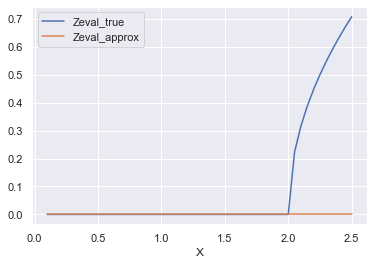

In [12]:
grid_eval.set_index('X')\
         [['Zeval_true','Zeval_approx']]\
         .plot()

## Part i
Calculate the maximum absolute value of the difference between the function (i.e., `Zeval_true`) and your approximation of the function (i.e., `Zeval_approx`). Do this both for the range $[0.1,2.0]$ (i.e., the range of interpolation), and also for the full range including the part of the range where you are extrapolating (i.e., where you are beyond the range of points used teo calculate the basis coefficients $b$).

Over the smaller grid:

In [13]:
grid['Zeval_approx'] = PolyApprox(X=grid['X'],
                                  Y=grid['Y'],
                                  b=b)

grid['Zeval_diff'] = grid['Zeval_true'].copy() -\
                     grid['Zeval_approx'].copy()                                   

In [14]:
grid['Zeval_diff'].abs().max()

0.0

And over the larger grid

In [15]:
grid_eval['Zeval_diff'] = grid_eval['Zeval_true'].copy() - \
                          grid_eval['Zeval_approx'].copy()

In [16]:
grid_eval['Zeval_diff'].abs().max()

0.7071067811865476

## Part j
Plot the difference between `Zeval_true` and `Zeval_approx`

In [17]:
grid_eval['Zeval_diff'] = grid_eval['Zeval_true'].copy() -\
                          grid_eval['Zeval_approx'].copy()

<AxesSubplot:xlabel='X'>

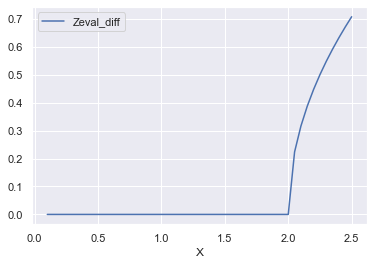

In [18]:
grid_eval.set_index('X')\
         [['Zeval_diff']]\
         .plot()

## Part k
Repeat this approximation exercise -- i.e., parts c through j -- with 15 and 35 points on each dimension of the grid used to calculate $b$. Plot these approximations together on the same figure.

First for 15 grid points

In [19]:
grid15 = np.linspace(start=0.1,
                     stop=2.0,
                     num=15)
#grid15 = pd.DataFrame(list(itertools.product(grid15,grid15)))
grid15 = pd.DataFrame(grid15)
grid15.columns=['X']
grid15['Y'] = np.nan

grid15['Zeval_true'] = grid15.apply(lambda df:
                                    fx(X=df['X']),
                                    axis=1)

b15=PolyGetCoef(X=grid15['X'],
                Y=grid15['Y'],
                Z=grid15['Zeval_true'])

grid15['Zeval_approx'] = PolyApprox(X=grid15['X'],
                                    Y=grid15['Y'],
                                    b=b15)                      

grid15['Zeval_diff'] = grid15['Zeval_true'].copy() -\
                       grid15['Zeval_approx'].copy()                                                                                     


grid_eval['Zeval_approx_15'] = PolyApprox(X=grid_eval['X'],
                                          Y=grid_eval['Y'],
                                          b=b15)                
                                          
grid_eval['Zeval_diff_15'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_15'].copy()

Here's the vector $b$

In [20]:
print(b15)

[0. 0. 0.]


Next for 35 grid points

In [21]:
grid35 = np.linspace(start=0.1,
                     stop=2.0,
                     num=35)
#grid35 = pd.DataFrame(list(itertools.product(grid35,grid35)))
grid35 = pd.DataFrame(grid35)
grid35.columns=['X']
grid35['Y'] = np.nan

grid35['Zeval_true'] = grid35.apply(lambda df:
                                    fx(X=df['X']),
                                    axis=1)

b35=PolyGetCoef(X=grid35['X'],
                Y=grid35['Y'],
                Z=grid35['Zeval_true'])

grid35['Zeval_approx'] = PolyApprox(X=grid35['X'],
                                    Y=grid35['Y'],
                                    b=b35)

grid35['Zeval_diff'] = grid35['Zeval_true'].copy() -\
                       grid35['Zeval_approx'].copy()

grid_eval['Zeval_approx_35'] = PolyApprox(X=grid_eval['X'],
                                          Y=grid_eval['Y'],
                                          b=b35)                
                                          
grid_eval['Zeval_diff_35'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_35'].copy()                                                                       

Here's the vector $b$

In [22]:
print(b35)

[0. 0. 0.]


Here's the absolute difference between the true value and approximmation by number of grid points and which grid.

In [23]:
e = [grid['Zeval_diff'].abs().max(),
     grid15['Zeval_diff'].abs().max(),
     grid35['Zeval_diff'].abs().max()]

e_eval = [grid_eval['Zeval_diff'].abs().max(),
          grid_eval['Zeval_diff_15'].abs().max(),
          grid_eval['Zeval_diff_35'].abs().max()]

e_merge = pd.DataFrame({'Number of grid points':[5,15,35],
                        'Max absolute error over the small grid':e,
                        'Max absolute error over the large grid':e_eval})

In [24]:
e_merge

,Number of grid points,Max absolute error over the small grid,Max absolute error over the large grid
0,5,0.0,0.707107
1,15,0.0,0.707107
2,35,0.0,0.707107


Here's the plot of the approximations

<AxesSubplot:xlabel='X'>

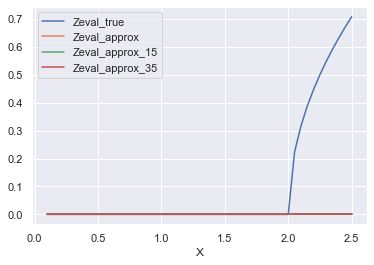

In [25]:
grid_eval.set_index(['X'])\
         [['Zeval_true','Zeval_approx','Zeval_approx_15',
          'Zeval_approx_35']]\
         .plot()

Here's the plot of the differences

In [26]:
grid_eval['Zeval_diff_15'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_15'].copy()

grid_eval['Zeval_diff_35'] = grid_eval['Zeval_true'].copy() -\
                             grid_eval['Zeval_approx_35'].copy()

<AxesSubplot:xlabel='X'>

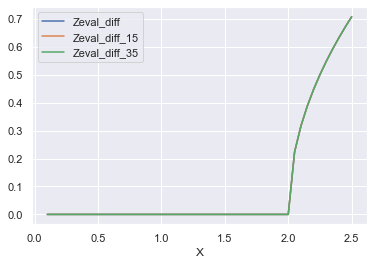

In [27]:
grid_eval.set_index(['X'])\
         [['Zeval_diff','Zeval_diff_15',
          'Zeval_diff_35']]\
         .plot()

## Part l
Discuss what you have learned about the quality of polynomial approximations

Looks like the quality of polynomial approximations have the potential to be quite good, and the quality increases with number of grid points and higher order polynomials used.

In part m with the piecewise function, the approximation does not do a great job. Mechanically, since $b$ is estimated in the small grid where all values of the function are 0, it results in a $b$ of 0, so then in the evaluation grid all approximations are 0 as well.